# Wine Quality Prediction

Fora Downloading the Dataset (https://github.com/shubh2002/DataSets)

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).


What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Wine_quality.csv',sep=';')

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

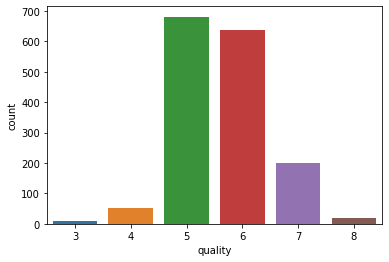

In [8]:
sns.countplot(x=df['quality'],data=df)

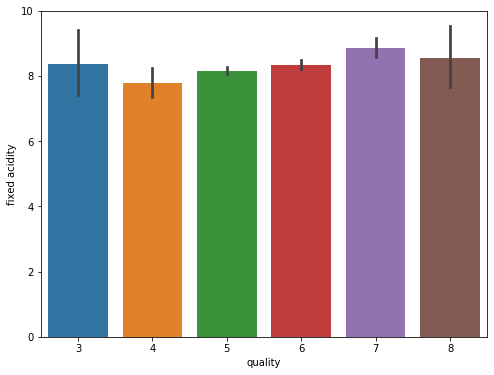

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(y=df['fixed acidity'],x=df['quality'],data=df)

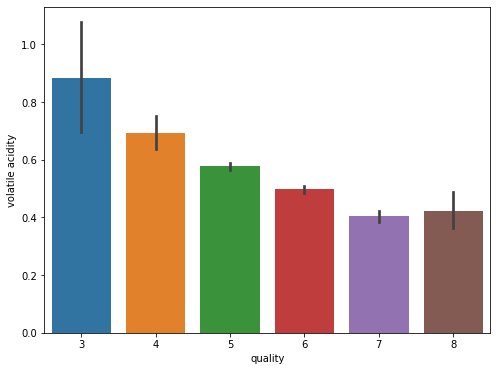

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(y=df['volatile acidity'],x=df['quality'],data=df)

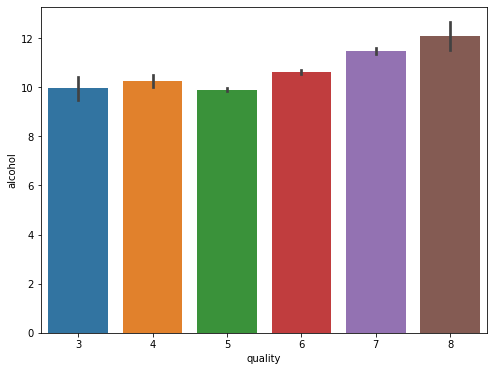

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['quality'],y=df['alcohol'],data=df)

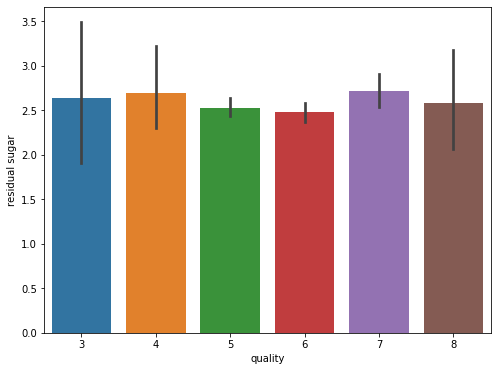

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['quality'],y=df['residual sugar'],data=df)

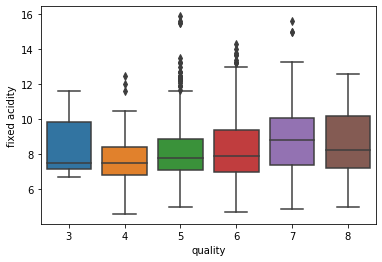

In [13]:
sns.boxplot(x=df['quality'],y=df['fixed acidity'],data=df)

fixed acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free sulfur dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total sulfur dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality                 AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

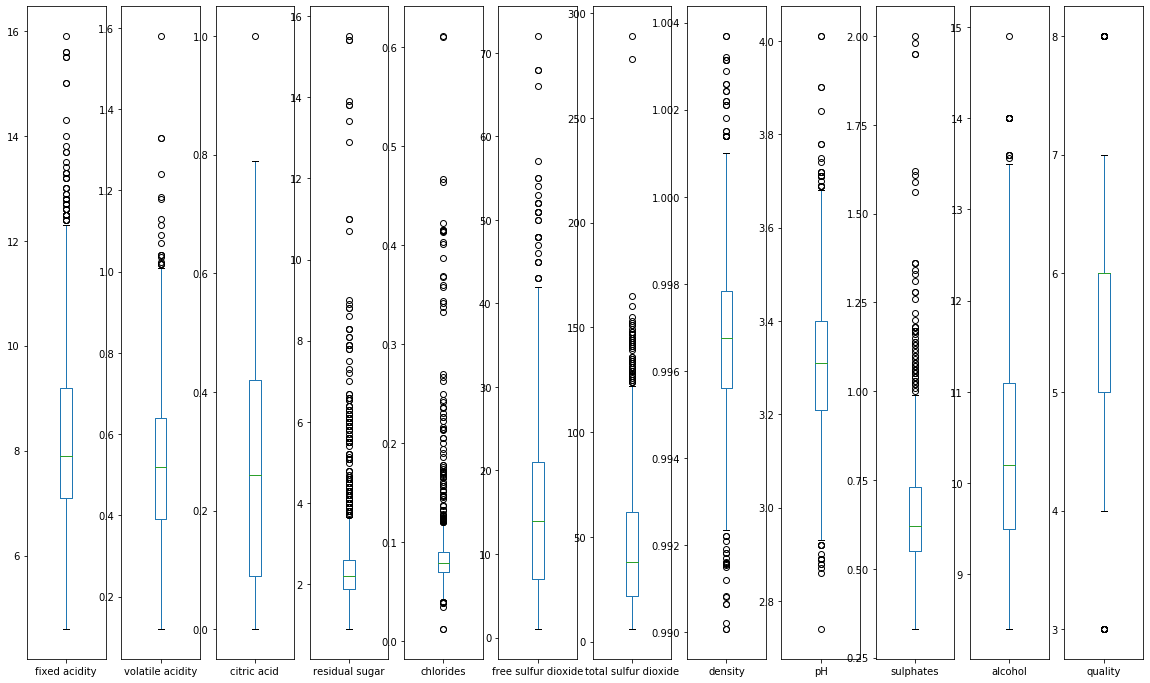

In [14]:

df.plot(kind='box',subplots=True,figsize=(20,12))

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
review=[]
for i in df['quality']:
    if i==3 or i==4:
        review.append('1')
    elif i==5 or i==6:
        review.append('2')
    else:
        review.append('3')

In [18]:
df['review']=review

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [20]:
df=df.drop('quality',axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,review
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [21]:
x=df.iloc[:,df.columns!='review']
x.shape

(1599, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x=scaling.fit_transform(x)

In [23]:
x.shape

(1599, 11)

In [24]:
y=df.iloc[:,df.columns=='review']
y.shape

(1599, 1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.86

In [27]:
from sklearn.svm import SVC
model2=SVC()
model2=model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
acc2

0.8725

In [28]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='gini')
model3=model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
acc3

0.8125

In [29]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4=model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
acc4

0.7625

In [30]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=1000)
model5=model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
acc5

0.885

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model6=AdaBoostClassifier()
model6=model6.fit(x_train,y_train)
y_pred=model6.predict(x_test)
acc6=accuracy_score(y_pred,y_test)
acc6

0.795

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model7=GradientBoostingClassifier()
model7=model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
acc7=accuracy_score(y_test,y_pred)
acc7

0.8525

In [33]:
from xgboost import XGBClassifier
model8=XGBClassifier(n_estimators=1000)
model8=model8.fit(x_train,y_train)
y_pred=model8.predict(x_test)
acc8=accuracy_score(y_test,y_pred)
acc8

0.8825

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model9=KNeighborsClassifier()
model9=model9.fit(x_train,y_train)
y_pred=model9.predict(x_test)
acc9=accuracy_score(y_test,y_pred)
acc9

0.8425

In [39]:
from sklearn.model_selection import cross_val_score
CV=[]
for i in [model1,model2,model3,model4,model5,model6,model7,model8,model9]:
    score=cross_val_score(i,x,y,cv=20,scoring='accuracy')
    score=score.mean()
    CV.append(score)

In [40]:
models=pd.DataFrame({'MODELS':['LOGISTIC REGRESSION','SUPPORT VECTOR MACHINE','DECISION TREE CLASSIFIER','NAIVE BAYES','RANDOM FOREST'
                              ,'ADA BOOST','GRADIENT BOOSTING','XG BOOST','K NEIGHBORS CLASSIFIER'],
                               'SCORE':[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9],'CROSS VALID':CV})
models.sort_values(by='SCORE',ascending=False)

,MODELS,SCORE,CROSS VALID
4,RANDOM FOREST,0.8850,0.844973
7,XG BOOST,0.8825,0.824365
1,SUPPORT VECTOR MACHINE,0.8725,0.842497
0,LOGISTIC REGRESSION,0.8600,0.838730
6,GRADIENT BOOSTING,0.8525,0.824309
8,K NEIGHBORS CLASSIFIER,0.8425,0.813034
2,DECISION TREE CLASSIFIER,0.8125,0.769181
5,ADA BOOST,0.7950,0.748678
3,NAIVE BAYES,0.7625,0.774298
